<a href="https://colab.research.google.com/github/shreya2512005-commits/skills4future_fc/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
data = pd.read_csv('/content/predict_energy_consumption.xls')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [12]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [14]:
#feature and target selection
X = data[['temperature','humidity','wind_speed','solar_irradiance',]]
y = data['energy_consumption'].values

In [15]:
#Split the dataset
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
#standardize the data
ss=StandardScaler()
Xtr=ss.fit_transform(Xtr)
Xte=ss.transform(Xte)

In [17]:
#create a neural network
model=Sequential([Dense(64,activation='relu',input_shape=(Xtr.shape[1],)),Dense(32,activation='relu'),Dense(1)])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [19]:
#train the model
history=model.fit(Xtr,ytr,epochs=30,batch_size=32,validation_split=0.2,verbose=2)

Epoch 1/30
20/20 - 2s - 107ms/step - loss: 90297.7812 - mae: 271.5890 - val_loss: 83638.9844 - val_mae: 258.8989
Epoch 2/30
20/20 - 0s - 5ms/step - loss: 89854.6797 - mae: 270.7791 - val_loss: 83116.5703 - val_mae: 257.8842
Epoch 3/30
20/20 - 0s - 5ms/step - loss: 89132.6250 - mae: 269.4327 - val_loss: 82189.5469 - val_mae: 256.0749
Epoch 4/30
20/20 - 0s - 5ms/step - loss: 87884.7344 - mae: 267.1179 - val_loss: 80684.9219 - val_mae: 253.1136
Epoch 5/30
20/20 - 0s - 5ms/step - loss: 85970.5000 - mae: 263.4688 - val_loss: 78414.4844 - val_mae: 248.5755
Epoch 6/30
20/20 - 0s - 5ms/step - loss: 83144.6250 - mae: 258.0440 - val_loss: 75212.3750 - val_mae: 242.0228
Epoch 7/30
20/20 - 0s - 5ms/step - loss: 79209.6016 - mae: 250.4030 - val_loss: 70950.2344 - val_mae: 233.0009
Epoch 8/30
20/20 - 0s - 5ms/step - loss: 74177.7969 - mae: 239.9826 - val_loss: 65508.6250 - val_mae: 220.9234
Epoch 9/30
20/20 - 0s - 6ms/step - loss: 67874.7578 - mae: 226.6473 - val_loss: 59215.7383 - val_mae: 206.1526

In [20]:
test_loss,test_mae=model.evaluate(Xte,yte,verbose=1)
print(f'Test Mean Absolute Error:{test_mae:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 18355.6172 - mae: 116.4562
Test Mean Absolute Error:116.47


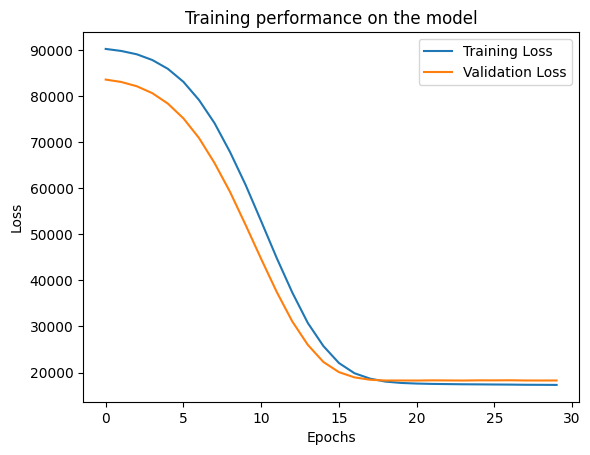

In [21]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training performance on the model')
plt.legend()
plt.show()

In [22]:
predictions=model.predict(Xte)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[271.5529 ],
       [234.14844],
       [262.29807],
       [199.78001],
       [345.7087 ],
       [303.93393],
       [326.6358 ],
       [270.1    ],
       [288.67712],
       [277.94327],
       [239.28519],
       [266.79578],
       [262.47696],
       [225.12997],
       [318.51828],
       [313.13916],
       [260.39206],
       [285.89505],
       [296.6827 ],
       [269.05035],
       [264.96518],
       [289.54794],
       [290.18658],
       [257.95163],
       [251.73325],
       [240.43517],
       [272.36285],
       [319.7875 ],
       [321.10703],
       [245.81854],
       [228.30376],
       [308.59567],
       [305.33804],
       [286.29523],
       [309.23566],
       [285.44815],
       [204.36446],
       [254.90276],
       [304.32367],
       [245.46292],
       [249.79985],
       [249.55838],
       [244.55681],
       [255.45978],
       [259.9351 ],
       [254.25389],
       [275.0439 ],
       [251.4111 ],
       [298.34317],
       [294.55667],


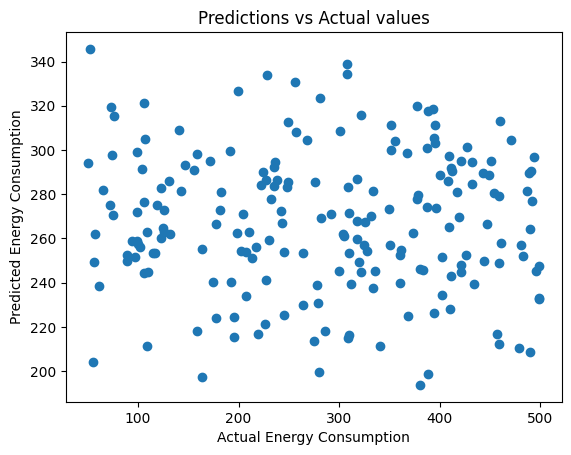

In [23]:
plt.scatter(yte,predictions)
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs Actual values')
plt.show()